<a href="https://colab.research.google.com/github/sricharan245/python-developments/blob/main/Titanic_Survival_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/titanic/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Sex'] = df['Sex'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


In [9]:
# drop Cabin, Name, PassengerId, Ticket
colsToRemove = ['Cabin', 'Name', 'PassengerId', 'Ticket']
df.drop(colsToRemove, axis=1, inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df.Age.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [12]:
# get df where Age is null

df.Age.fillna(df.Age.median(), inplace=True)



In [13]:
df.dropna(inplace=True)

In [14]:
print(df.shape)
df.head()

(889, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


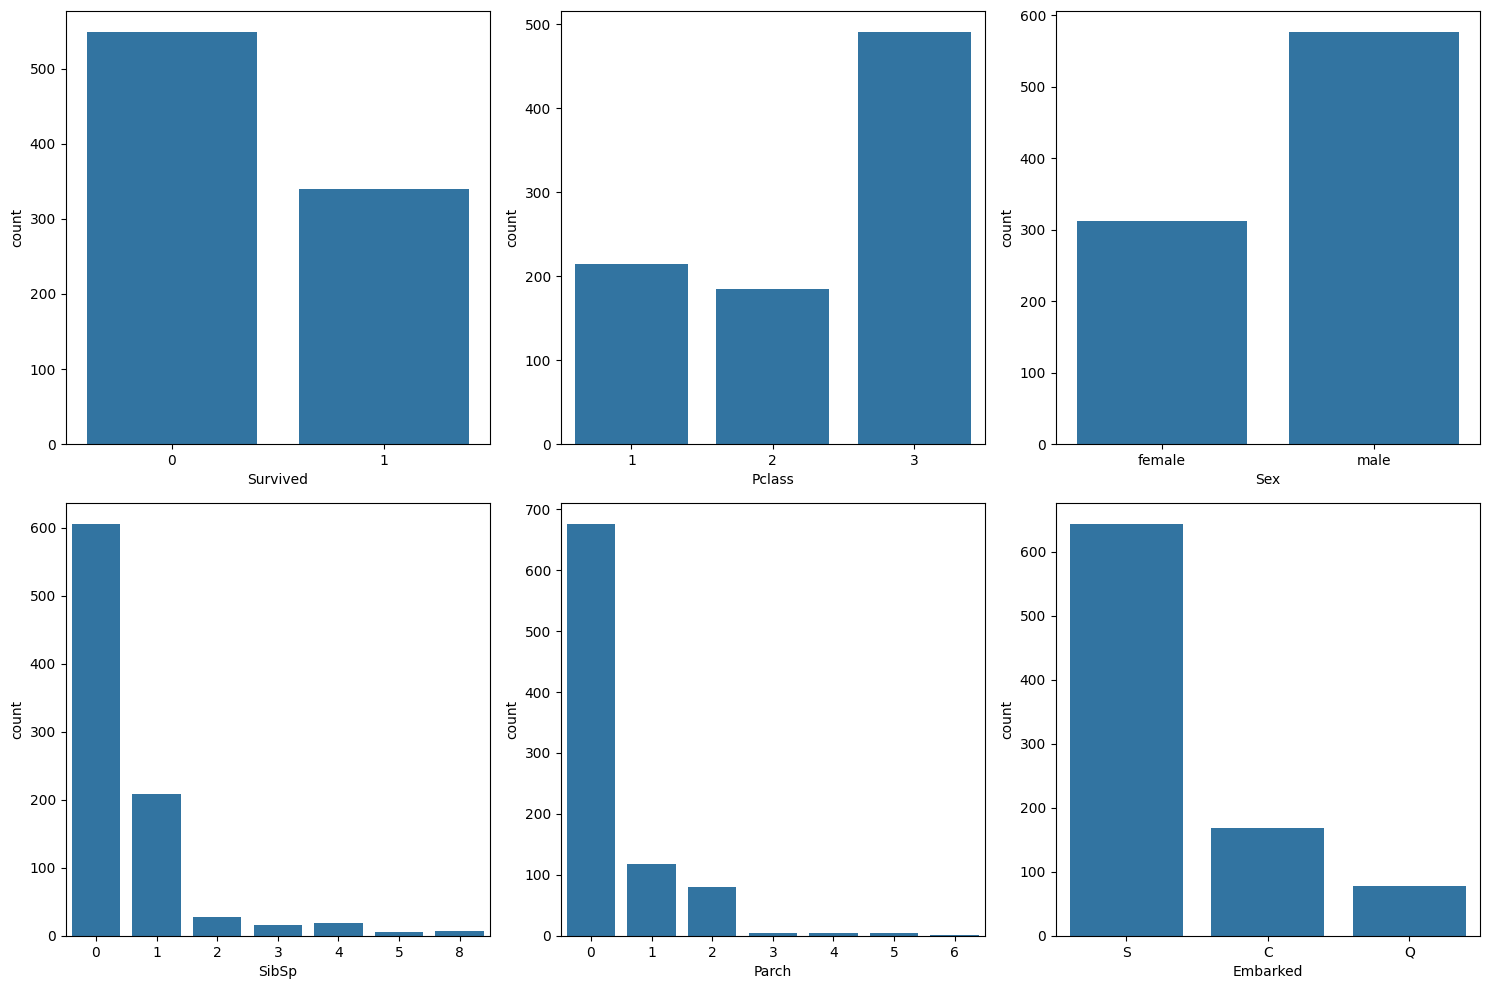

In [15]:
# count plot with Survived, Pclass, Sex, SibSp, Parch, Embarked
%matplotlib inline
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(x='Survived', data=df, ax=ax[0, 0])
sns.countplot(x='Pclass', data=df, ax=ax[0, 1])
sns.countplot(x='Sex', data=df, ax=ax[0, 2])
sns.countplot(x='SibSp', data=df, ax=ax[1, 0])
sns.countplot(x='Parch', data=df, ax=ax[1, 1])
sns.countplot(x='Embarked', data=df, ax=ax[1, 2])
plt.tight_layout()
plt.show()

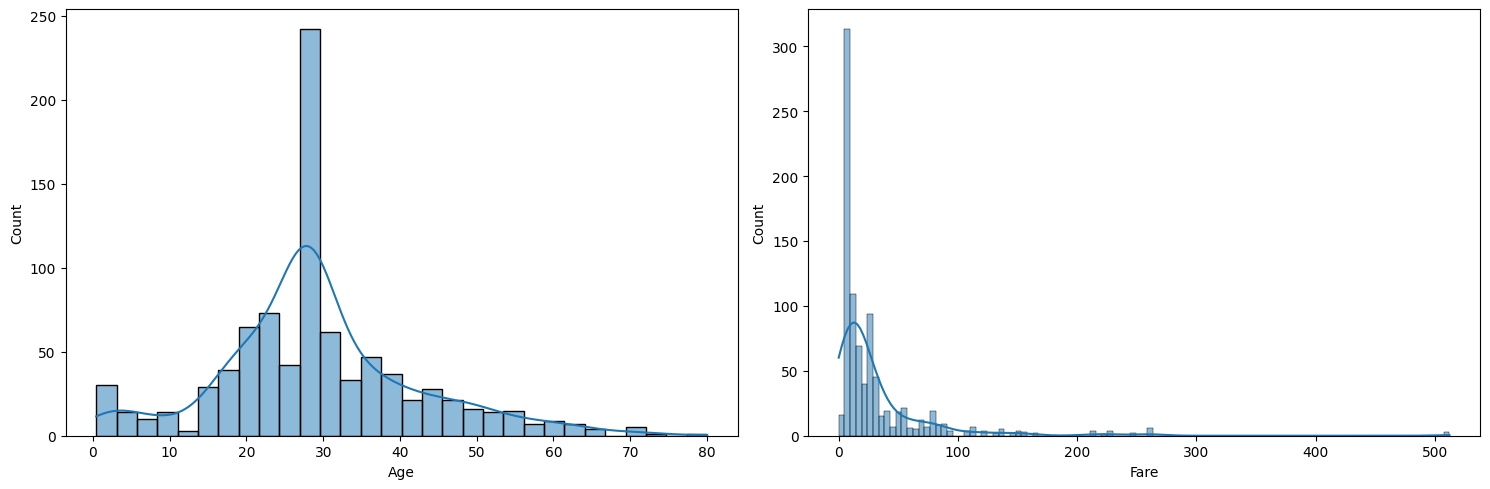

In [16]:
# Histogram
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df.Age, kde=True, ax = ax[0])
sns.histplot(df.Fare, kde=True, ax = ax[1])
plt.tight_layout()
plt.show()

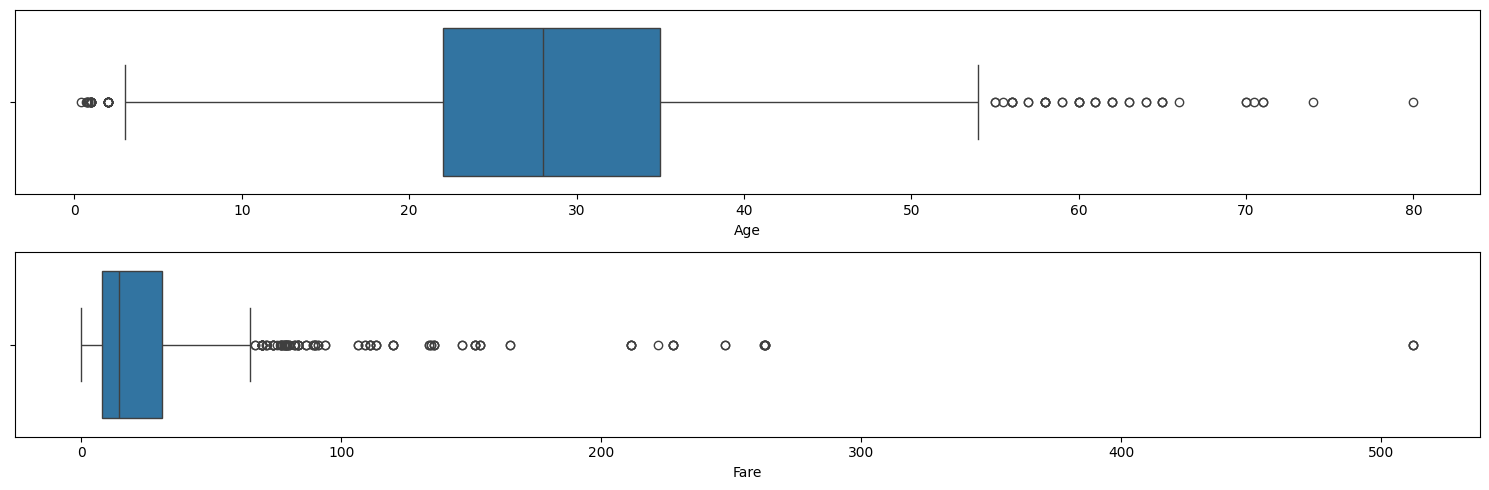

In [17]:
# box plot horizontal
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
sns.boxplot(df.Age,ax = ax[0],orient='h')
sns.boxplot(df.Fare, ax = ax[1], orient='h')
plt.tight_layout()
plt.show()

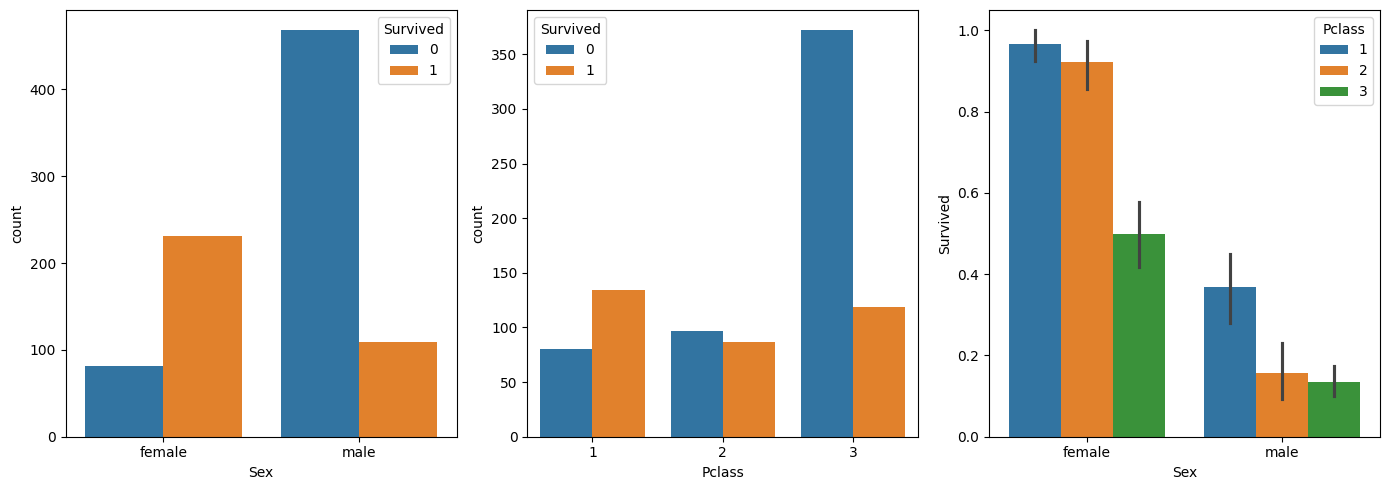

In [18]:
# plot Survived vs Sex plot


fig, ax = plt.subplots(1, 3, figsize=(14, 5))
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[0])
sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax[1])
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, ax = ax[2])
plt.tight_layout()
plt.show()

In [19]:
print(df.shape)
df.head()

(889, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


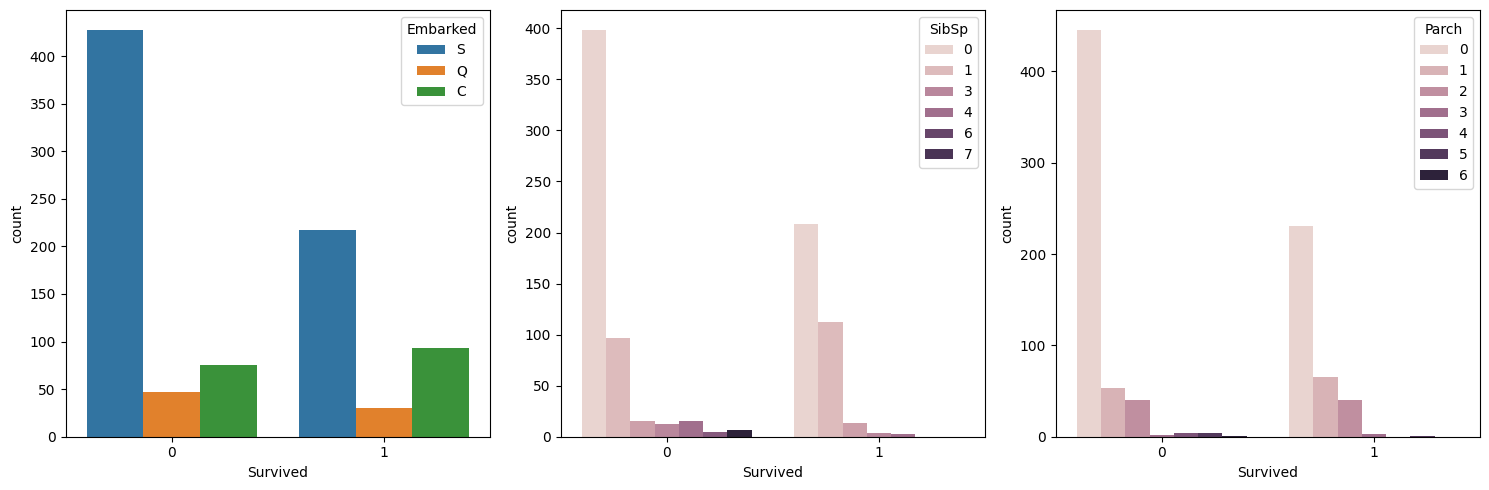

In [20]:
# Count plot Survived vs embarked, Sibsp, Parch

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Survived', hue='Embarked', data=df, ax=ax[0])
sns.countplot(x='Survived', hue='SibSp', data=df, ax=ax[1])
sns.countplot(x='Survived', hue='Parch', data=df, ax=ax[2])
plt.tight_layout()
plt.show()

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    category
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    object  
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 50.6+ KB


In [23]:
df[df.Survived.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [24]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
# df['Pclass'] = df['Pclass'].replace({1: 3, 2: 2, 3: 1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [25]:
df.shape

(889, 8)

In [26]:
# one hot encoding

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first', dtype=np.int16)
df_encoded_vars = pd.DataFrame(ohe.fit_transform(df[['Embarked']]), columns=ohe.get_feature_names_out(['Embarked']))
df_encoded_vars.head()


,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
# Label encoding

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
#  = le.fit_transform(df['Pclass'])
# df.head()

In [28]:
df.reset_index(drop=True, inplace=True)
df_encoded_vars.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df.drop('Embarked', axis =1 ), df_encoded_vars], axis=1)
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [29]:
df_encoded.shape

(889, 9)

In [30]:
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 8), (178, 8), (711,), (178,))

## Modeling


### Logistic Regression

In [31]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7988748241912799
0.7808988764044944


In [33]:
y_pred_lr = lr.predict(X_test)

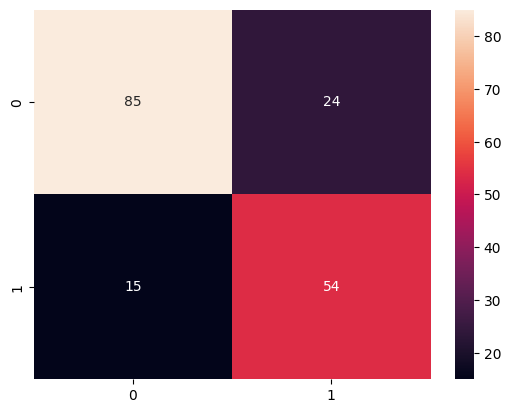

In [34]:
# Confusion matrix plot

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.show()

In [35]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



### Decision Tree

In [36]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_impurity_decrease=.01)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3,
                       min_impurity_decrease=0.01)

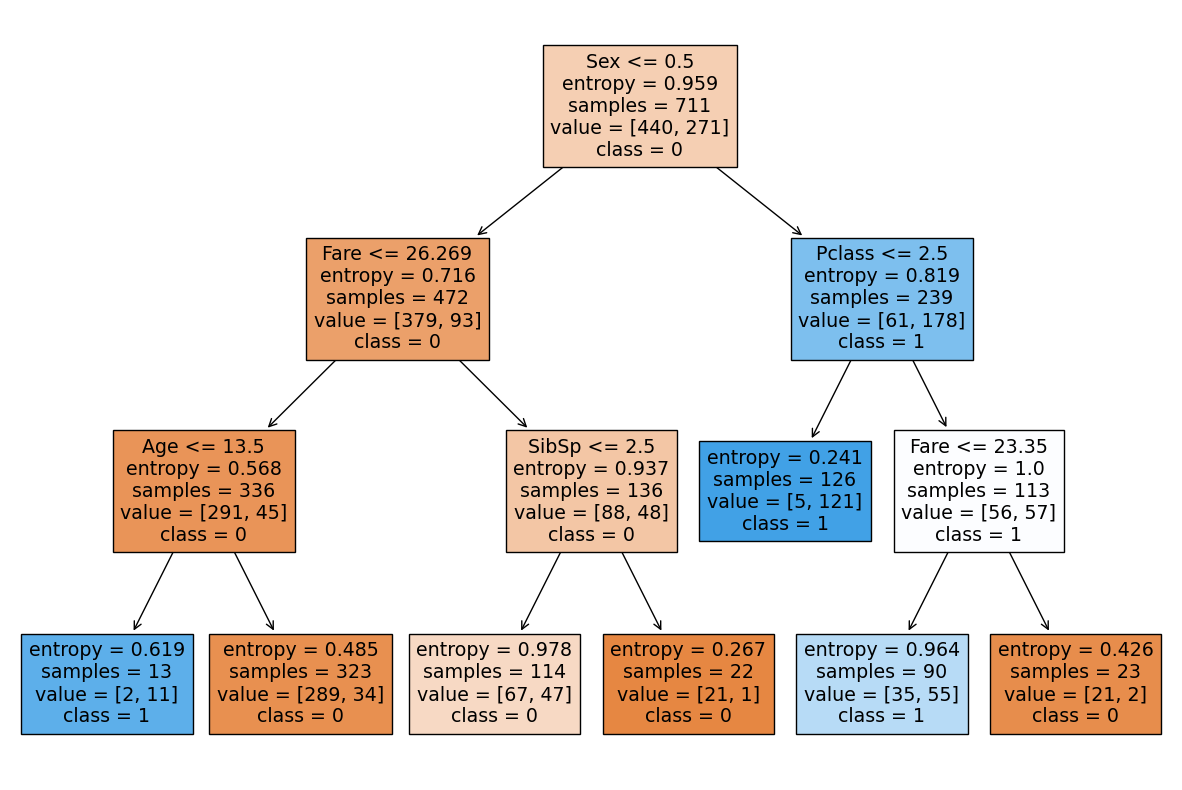

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()

In [38]:
dt.score(X_train, y_train)

0.8227848101265823

In [39]:
dt.score(X_test, y_test)

0.8202247191011236

In [40]:
pd.DataFrame(dt.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

,importance
Sex,0.542682
Pclass,0.192603
Fare,0.132336
Age,0.095474
SibSp,0.036905
Parch,0.000000
Embarked_Q,0.000000
Embarked_S,0.000000


In [41]:
y_pred_dt = dt.predict(X_test)

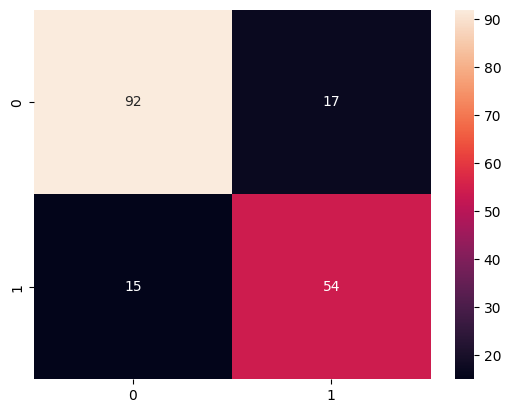

In [42]:
# Confusion matrix plot

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.show()

In [43]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       109
           1       0.76      0.78      0.77        69

    accuracy                           0.82       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



In [44]:
#  ROC

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_dt)

0.8133226964499403

In [36]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [ 200, 300],
    'max_depth': [3,5, 7, 9],
    'min_samples_split': [3, 5],
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)


{'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 200}
0.8438688072490889


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250, max_depth=5, min_samples_split=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=250)

In [49]:
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.8523206751054853
0.8202247191011236


In [50]:
y_pred_rf = rf.predict(X_test)

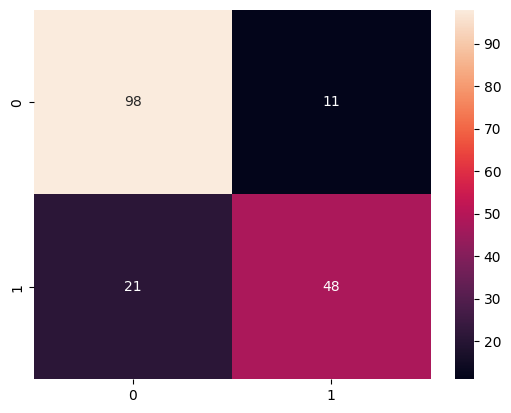

In [51]:
# Confusion matrix plot

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.show()

In [52]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       109
           1       0.81      0.70      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



In [ ]:
# adaboost

from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'n_estimators': [50,100],
    'learning_rate' : [10, 1, 0.1]
}

adaCV = AdaBoostClassifier()
grid_search = GridSearchCV(estimator=adaCV, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 1, 'n_estimators': 100}
0.8185068452674088


In [ ]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
ada.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=42)

In [ ]:
print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))


0.8621659634317862
0.8033707865168539


In [ ]:
y_pred_ada = ada.predict(X_test)



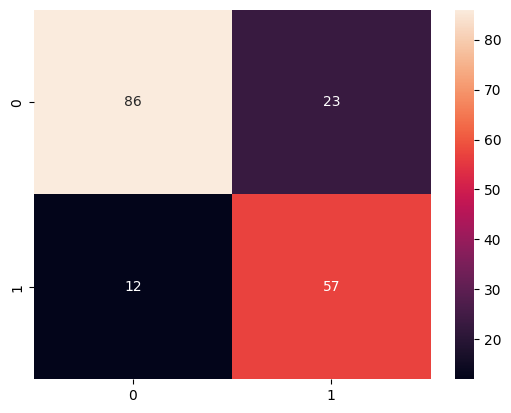

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       109
           1       0.71      0.83      0.77        69

    accuracy                           0.80       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.81      0.80      0.81       178



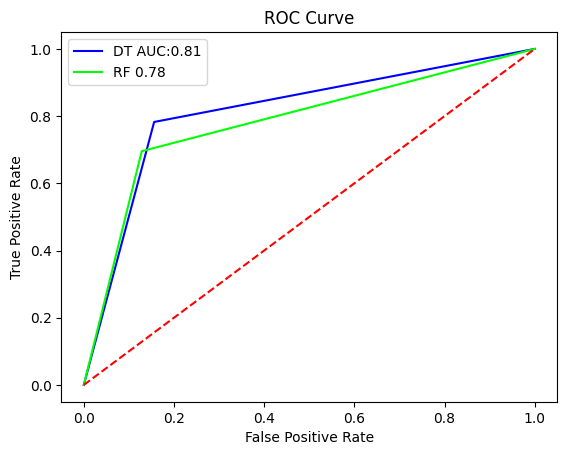

In [53]:
# ROC plot

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr, color='blue', label = 'DT AUC:' + str(round(roc_auc_score(y_test, y_pred_dt), 2)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr, color = 'lime', label = 'Logit ' + str(round(roc_auc_score(y_test, y_pred_rf),2)))
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
# plt.plot(fpr, tpr, color = 'green', label = 'GB ' + str(round(roc_auc_score(y_test, y_pred_gb),2)))
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)
# plt.plot(fpr, tpr, color = 'purple', label = 'Ada ' + str(round(roc_auc_score(y_test, y_pred_ada),2)))
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
# plt.plot(fpr, tpr, color = 'orange', label = 'KNN ' + str(round(roc_auc_score(y_test, y_pred_knn),2)))
plt.plot([0, 1], [0, 1], linestyle='--', color = 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Hyperparameter tuning for Decision Tree

param_grid = {
    'max_depth': [3,5, 7],
    'min_impurity_decrease': [0.01, 0.02, 0.05]
}

dtCV = RandomForestClassifier()
grid_search = GridSearchCV(estimator=dtCV, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 3, 'min_impurity_decrease': 0.01}
0.8157588889983256


In [53]:
# K-fold CV

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=10)
print(scores)
print(scores.mean())

[0.7752809  0.83146067 0.76404494 0.88764045 0.91011236 0.82022472
 0.79775281 0.76404494 0.87640449 0.85227273]
0.8279239019407558


In [56]:
# LOOCV

from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(rf, X, y, cv=loo)

print(scores.mean())

KeyboardInterrupt: 

In [54]:
import pandas as pd

td_raw = pd.read_csv('test.csv')

td_raw.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
td = td_raw.drop(colsToRemove, axis=1)
td.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [56]:
td.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [57]:
td.Age.fillna(td.Age.median(), inplace=True)
td.Fare.fillna(td.Fare.mean(), inplace=True)

In [58]:
td['Sex'] = td['Sex'].replace({'male': 0, 'female': 1})

In [59]:
encoded_vars = pd.DataFrame(ohe.fit_transform(td[['Embarked']]), columns=ohe.get_feature_names_out(['Embarked']))
encoded_vars.head()

,Embarked_Q,Embarked_S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [60]:
td_encoded= pd.concat([td.drop('Embarked', axis =1 ), encoded_vars], axis=1)
td_encoded.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,1,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,1,0
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,1


In [65]:
preds = rf.predict(td_encoded)


In [66]:
submission_df = pd.DataFrame(preds, columns=['Survived'], index=td_raw['PassengerId'])

In [67]:
submission_df.reset_index(inplace=True)

In [68]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [69]:
submission_df.to_csv('submission.csv', index=False)

In [70]:
pd.read_csv('submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
